In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\orteg\AppData\Local\Temp\ipykernel_11748\687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Persons

In [2]:
name_basic = pd.read_csv('Data/name-basics.tsv', sep='\t')

In [3]:
name_basic.head(3)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0031983,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0075213,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"


In [4]:
name_basic.describe()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
count,13221794,13221787,13221794,13221794,10567492,13221794
unique,13221794,10202708,529,471,21690,5596976
top,nm0000001,Alex,\N,\N,actor,\N
freq,1,466,12617124,12996973,2384332,1541476


In [5]:
name_basic['birthYear'] = pd.to_numeric(name_basic['birthYear'], errors='coerce')
name_basic['deathYear'] = pd.to_numeric(name_basic['deathYear'], errors='coerce')

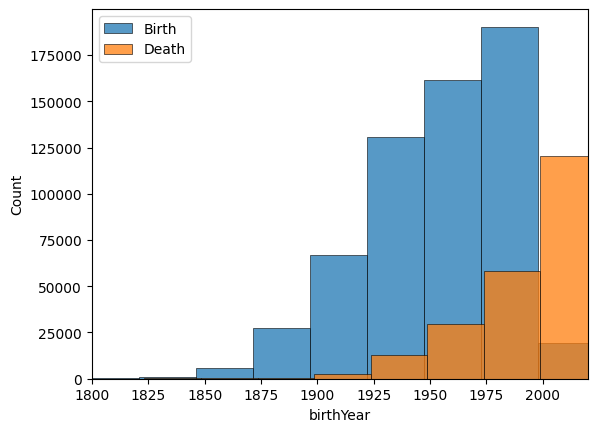

In [6]:
sns.histplot(name_basic['birthYear'], bins=80, label='Birth')
sns.histplot(name_basic['deathYear'], bins=80, label='Death')
plt.xlim(1800, 2020)
plt.legend()
plt.show()

In [7]:
#proportion of actors
name_basic['primaryProfession'] = name_basic['primaryProfession'].str.split(',')
name_basic['primaryProfession'] = name_basic['primaryProfession'].fillna('')
name_basic['IsActor'] = name_basic['primaryProfession'].apply(lambda x: 'actor' in x)
name_basic['IsActor']

0            True
1           False
2           False
3            True
4            True
            ...  
13221789    False
13221790    False
13221791    False
13221792    False
13221793    False
Name: IsActor, Length: 13221794, dtype: bool

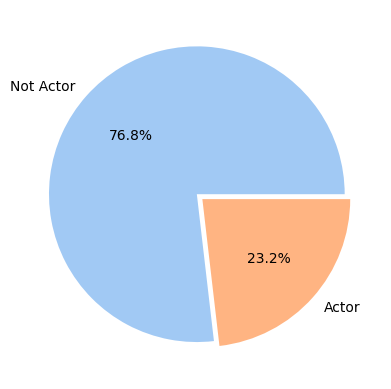

In [10]:
colors = sns.color_palette("pastel")[:2]
plt.pie(name_basic['IsActor'].value_counts(), labels=['Not Actor', 'Actor'], colors=colors, autopct='%1.1f%%', explode=(0, 0.05))
plt.show()

## Akas

In [18]:
akas = pd.read_csv('Data/title-akas.tsv', sep='\t')

C:\Users\orteg\AppData\Local\Temp\ipykernel_24864\1207360960.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  akas = pd.read_csv('Data/title-akas.tsv', sep='\t')


In [19]:
akas.head(3)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0


In [20]:
akas[akas.columns.difference(["ordering"])].describe()

,attributes,isOriginalTitle,language,region,title,titleId,types
count,38576732,38576732,38576732,38576615,38576714,38576732,38576732
unique,187,5,108,248,4509809,7538269,24
top,\N,0,\N,JP,Episodio #1.1,tt0088814,\N
freq,38303491,23640442,6913801,4637497,100294,251,32771508


In [35]:
top_10_languages = akas['language'].value_counts().head(10)
top_10_languages.drop('\\N', inplace=True)
top_10_languages

language
ja    4496745
fr    4459680
hi    4426489
es    4392783
de    4392362
it    4390641
pt    4390492
en     510719
tr      36940
Name: count, dtype: int64

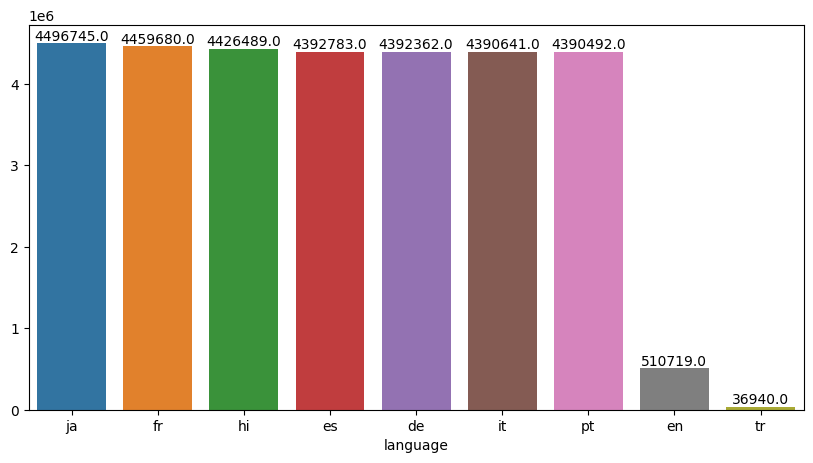

In [34]:
#number of film per language in top 10
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_10_languages.index, y=top_10_languages.values, hue=top_10_languages.index, legend=False)

# Adding annotations to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

## Film

In [4]:
film = pd.read_csv('Data/title-basic.tsv', sep='\t')

C:\Users\orteg\AppData\Local\Temp\ipykernel_11748\2883003333.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  film = pd.read_csv('Data/title-basic.tsv', sep='\t')


In [5]:
film.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"


In [7]:
film.describe().T

,count,unique,top,freq
tconst,10521657,10521657,tt0000001,1
titleType,10521657,11,tvEpisode,8043546
primaryTitle,10521640,4726114,Episode #1.1,50323
originalTitle,10521640,4749379,Episode #1.1,50323
isAdult,10521657,14,0,10123910
startYear,10521657,153,\N,1394112
endYear,10521657,97,\N,10403566
runtimeMinutes,10521657,950,\N,7318857
genres,10521639,2360,Drama,1205066


## Rating

In [9]:
ratings = pd.read_csv('Data/title-ratings.tsv', sep='\t')
films = pd.read_csv('Data/title-basic.tsv', sep='\t')

C:\Users\orteg\AppData\Local\Temp\ipykernel_13492\606764220.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  films = pd.read_csv('Data/title-basic.tsv', sep='\t')


In [5]:
ratings.head(3)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2020
1,tt0000002,5.7,270
2,tt0000003,6.5,1944


In [6]:
ratings.describe()

,averageRating,numVotes
count,1.397149e+06,1.397149e+06
mean,6.955867e+00,1.037138e+03
std,1.385599e+00,1.764119e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.100000e+01
50%,7.100000e+00,2.600000e+01
75%,7.900000e+00,1.010000e+02
max,1.000000e+01,2.850766e+06


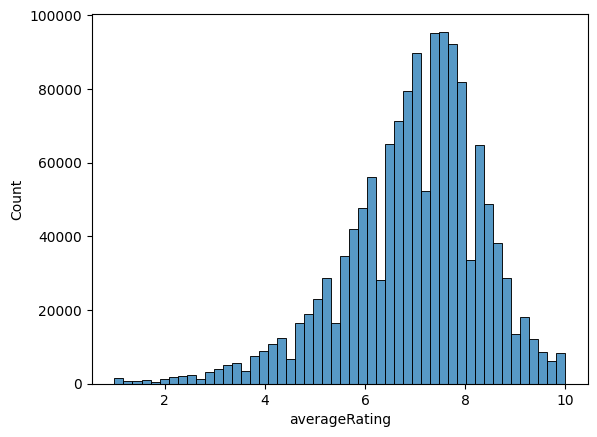

In [11]:
#distribution of ratings
sns.histplot(ratings['averageRating'], bins=50)
plt.show()

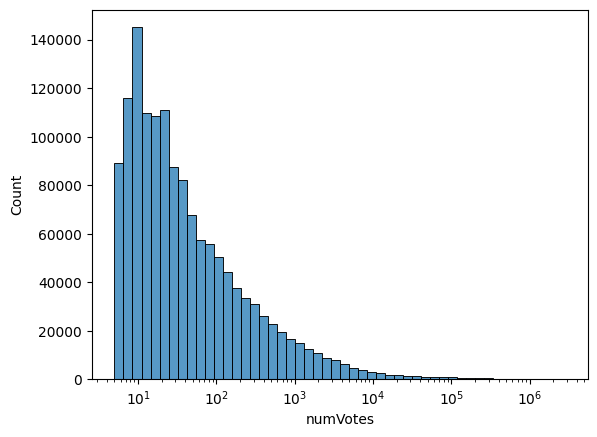

In [13]:
#number of votes log scale
sns.histplot(ratings['numVotes'], bins=50, log_scale=True)
plt.show()

## CrewMember

## CastingMember